## AirBNB - Lodging Configuration and Host Behavior
### Capstone - Thinkful Prep Course

#### Author: Will Becerra
#### Email: willbecerra@yahoo.com

#### Mentor: Yunus Bulut
#### Date: March 27, 2018

In [37]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

## Introduction

Airbnb operates an online marketplace and hospitality service for people to lease or rent short-term lodging including holiday cottages, apartments, homestays, hostel beds, or hotel rooms.  It was founded in 2008 and has since had a hand in over 260 million check-ins.

I chose this data set because my fiance manages AirBNB properties, and we want to find out what the best strategies are for AirBNB property managers, as she takes on new listings to manage.

Summary: I found that the majority of rentals in DC in 2015 were 1 bedrooms (70%), and identified the average price for each room configuration.  I also found that while there is not a direct correlation between host response rate and review rating, superhosts have almost 3 times the number of views for their properties as regular hosts.

## Data

Kaggle data set - AirBNB information from Insider AirBNB:  Adding Data to the Debate.  http://insideairbnb.com

The original data set had 3,723 entries and 92 columns and covered 4 states - DC, MD, NY, VA.  All but 28 entries were from DC, so I chose to focus the analysis on DC.  The data was last scraped in 2015.

The data includes broad types of variables related to geographic location, lodging configuration and host interaction.  My goal was to analyze the variables associated with configuration and pricing, along with data related to the host and their interactions, in order to analyze how pricing is related to the configuration type and the impact that host behavior can have.

The descriptive statistics of variables I'll be using will include mean, mode and standard deviation of bedrooms, pricing and ratings.

In [38]:
df_root = pd.read_csv('listings.csv')

First, created a DataFrame that included only DC listings.

In [39]:
df = df_root.loc[df_root['state'] == 'DC'].reset_index(drop=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 92 columns):
id                                  3696 non-null int64
listing_url                         3696 non-null object
scrape_id                           3696 non-null float64
last_scraped                        3696 non-null object
name                                3696 non-null object
summary                             3430 non-null object
space                               2961 non-null object
description                         3695 non-null object
experiences_offered                 3696 non-null object
neighborhood_overview               2457 non-null object
notes                               1702 non-null object
transit                             2574 non-null object
thumbnail_url                       3663 non-null object
medium_url                          3663 non-null object
picture_url                         3696 non-null object
xl_picture_url                      36

In [41]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7087327,https://www.airbnb.com/rooms/7087327,2.020000e+13,10/3/2015,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,Professional pictures coming soon! Welcome to ...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,18,NaN
1,975833,https://www.airbnb.com/rooms/975833,2.020000e+13,10/3/2015,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,Beautifully renovated Capitol Hill townhouse. ...,none,NaN,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,2.11
2,8409022,https://www.airbnb.com/rooms/8409022,2.020000e+13,10/3/2015,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,Prime location right on the Potomac River in W...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
3,8634774,https://www.airbnb.com/rooms/8634774,2.020000e+13,10/3/2015,Exclusive Catamaran Houseboat,DC Water living at its best! Million dollar v...,Large stable catamaran that boasts one of the ...,DC Water living at its best! Million dollar v...,none,Safe area with gates and next to secure milita...,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
4,8498095,https://www.airbnb.com/rooms/8498095,2.020000e+13,10/3/2015,"Cozy DC Condo, Close to Metro!","Cozy two-bedroom, two full bath condo in the h...",NaN,"Cozy two-bedroom, two full bath condo in the h...",none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN


As you can see, data includes information related to geographic location, lodging configuration and host interaction.  

I analyzed the data to see how pricing is related to the configuration type and how host behavior affects ratings. 

I looked at the variables: bedrooms, price, host_listings_count, host_response_rate, number_of_reviews, and review_scores_rating.

## Analytic Questions

### Competition in the Market - Configuration / Pricing
1. What is the most common lodging configuration?
2. What is the average price per configuration?
3. Is there a relationship between price and the number of items listed as amenities?

### Host Activity
4.	What kind of relationships can I find between variables associated with hosting and rating?
5.	What is the relationship between host response rate and review rating?
6.	What is the impact of being a Superhost?

These questions may shed light on strategies for new listings, such as what price a host should charge for a new listing, and what kinds of actions a host can take to improve ratings.


### Data Cleansing

First, I identified the missing data and then modified the empty values for the numerical columns that I'll be using.   The output below gives a summary of missing data by percentage for each variable.

In [42]:
df.isnull().sum()/df.count()

id                                     0.000000
listing_url                            0.000000
scrape_id                              0.000000
last_scraped                           0.000000
name                                   0.000000
summary                                0.077551
space                                  0.248227
description                            0.000271
experiences_offered                    0.000000
neighborhood_overview                  0.504274
notes                                  1.171563
transit                                0.435897
thumbnail_url                          0.009009
medium_url                             0.009009
picture_url                            0.000000
xl_picture_url                         0.009009
host_id                                0.000000
host_url                               0.000000
host_name                              0.000000
host_since                             0.000000
host_location                          0

For this study, variables of interest include bedrooms, price, host_listings_count, host_response_rate, number_of_reviews, and review_scores_rating.  These variables contain numerical values.

In [43]:
print('empty rows for bedrooms = ',df.isnull().bedrooms.sum())
print('empty rows for price = ',df.isnull().price.sum())
print('empty rows for host_listings_count = ',df.isnull().host_listings_count.sum())
print('empty rows for host_response_rate = ',df.isnull().host_response_rate.sum())
print('empty rows for number_of_reviews = ',df.isnull().number_of_reviews.sum())
print('empty rows for review_scores_rating = ',df.isnull().review_scores_rating.sum())

empty rows for bedrooms =  21
empty rows for price =  0
empty rows for host_listings_count =  0
empty rows for host_response_rate =  427
empty rows for number_of_reviews =  0
empty rows for review_scores_rating =  854


Next, I replaced empty (NaN) values with the applicable mode or mean.

In [44]:
df['bedrooms'].fillna(value = statistics.mode(df['bedrooms']), inplace=True)
df['host_response_rate'].fillna(value = statistics.mode(df['host_response_rate']), inplace=True)
df.fillna(value=np.mean(df), inplace=True)

Next, I modified values that were strings, so they could be analyzed numerically.

The values of price, security deposit, cleaning fee, and extra people have '$' and ',' symbols. I removed these symbols and made the values into floats.

The values of host_response_rate, host_acceptance_rate have '%' sign. I made these values into floats as well.

In [45]:
df['price'] = (df['price'].replace( '[\$,)]','', regex=True ).astype(float))
df['security_deposit'] = (df['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float))
df['cleaning_fee'] = (df['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float))
df['extra_people'] = (df['extra_people'].replace( '[\$,)]','', regex=True ).astype(float))

df['host_response_rate'] = (df['host_response_rate'].replace( '[\%,)]','', regex=True ).astype(float))
df['host_acceptance_rate'] = (df['host_acceptance_rate'].replace( '[\%,)]','', regex=True ).astype(float))

## Data Analysis

### * Section 1: Competition in the Market - Lodging Configuration / Pricing

### Question #1 - What's the most common lodging configuration, as far as number of rooms?

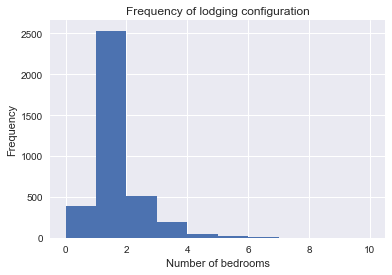

In [46]:
plt.hist(df['bedrooms'])
plt.title('Frequency of lodging configuration')
plt.xlabel('Number of bedrooms')
plt.ylabel('Frequency')
plt.show()

In [47]:
df['bedrooms'].value_counts(normalize=True)

1.0     0.685606
2.0     0.137175
0.0     0.105790
3.0     0.051136
4.0     0.011634
5.0     0.005682
6.0     0.002165
8.0     0.000541
10.0    0.000271
Name: bedrooms, dtype: float64

The most common configurations are 1 bedroom (68.5%) followed by 2 bedrooms (13.7%).

### Question #2 - What's the average price lodging configuraton (number of rooms)?

In [48]:
bed_grouped = pd.DataFrame(df.groupby(['bedrooms']).mean()['price'], columns = ['price'])
bed_grouped['std'] = df.groupby(['bedrooms']).std()['price']
bed_grouped.columns = ['average price', 'standard deviation']
bed_grouped

,average price,standard deviation
bedrooms,,
0.0,115.652174,42.677223
1.0,116.379242,80.580436
2.0,223.972387,147.759109
3.0,327.952381,240.618801
4.0,373.116279,181.394362
5.0,561.666667,579.235387
6.0,664.125000,568.322202
8.0,1225.000000,35.355339
10.0,1250.000000,NaN


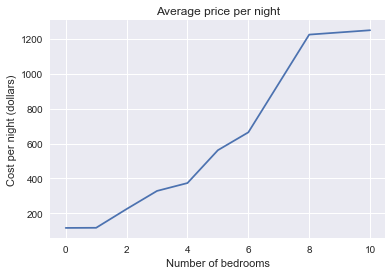

In [50]:
plt.plot(bed_grouped['average price'])
plt.title('Average price per night')
plt.xlabel('Number of bedrooms')
plt.ylabel('Cost per night (dollars)')
plt.show()

0 bedrooms denotes a studio apartment.  

1 bedrooms average a price of \$116.40 per night with a standard deviation of $80.58.

The price increases linearly with the number of bedrooms, but once we get to 6 bedrooms, the prices increase steeply.  This may tell us that there is less price sensitivity as the accomodations reach a certain size or are more luxurious.

### Question # 3 - Is there a relationship between price and the number of items listed as amenities?

In [51]:
# df['number_of_amenities'] = df.amenities.apply(lambda x: len(x))
df['number_of_amenities'] = df.amenities.str.count(',') + 1

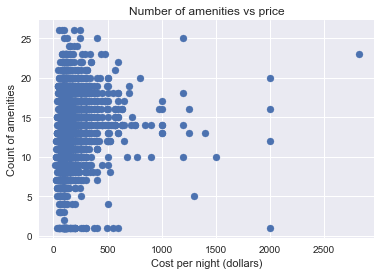

In [52]:
plt.scatter(df['price'], df['number_of_amenities'])
plt.title('Number of amenities vs price')
plt.xlabel('Cost per night (dollars)')
plt.ylabel('Count of amenities')
plt.show()

In [53]:
df['price'].corr(df['number_of_amenities'])

0.09965903315472435

The scatter plot and correlation calculation show that there is not a substantial direct relationship between number of amenities listed and price.

### * Section 2:  Host Activity

### Question #4 - What kind of relationships can I find between variables associated to hosting and rating?  

Here, I created a new DataFrame that contains only variables that have numerical values.  

In [54]:
features = df[['host_response_rate', 'host_acceptance_rate', 'host_listings_count',  'host_total_listings_count', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 
                     'minimum_nights', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy']]

In [55]:
features.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy
0,92.0,91.0,26,26,4,1.0,1.0,2.0,160.0,100.0,115.0,1,0.0,1,0,93.434201,9.540035
1,90.0,100.0,1,1,6,3.0,3.0,3.0,350.0,NaN,100.0,1,0.0,2,65,94.000000,10.000000
2,100.0,NaN,1,1,2,1.0,1.0,1.0,95.0,NaN,NaN,1,0.0,1,0,93.434201,9.540035
3,100.0,100.0,1,1,4,1.0,2.0,4.0,99.0,NaN,NaN,2,25.0,1,0,93.434201,9.540035
4,100.0,NaN,1,1,4,2.0,2.0,2.0,100.0,150.0,50.0,2,40.0,3,0,93.434201,9.540035


In [56]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 17 columns):
host_response_rate           3696 non-null float64
host_acceptance_rate         3091 non-null float64
host_listings_count          3696 non-null int64
host_total_listings_count    3696 non-null int64
accommodates                 3696 non-null int64
bathrooms                    3696 non-null float64
bedrooms                     3696 non-null float64
beds                         3696 non-null float64
price                        3696 non-null float64
security_deposit             1416 non-null float64
cleaning_fee                 2323 non-null float64
guests_included              3696 non-null int64
extra_people                 3696 non-null float64
minimum_nights               3696 non-null int64
number_of_reviews            3696 non-null int64
review_scores_rating         3696 non-null float64
review_scores_accuracy       3696 non-null float64
dtypes: float64(11), int64(6)
memory u

I used a Pearson Correlation Chart to show how the multiple variables are related to each other.  
I filled in the remaining missing values with the mean for each variable.

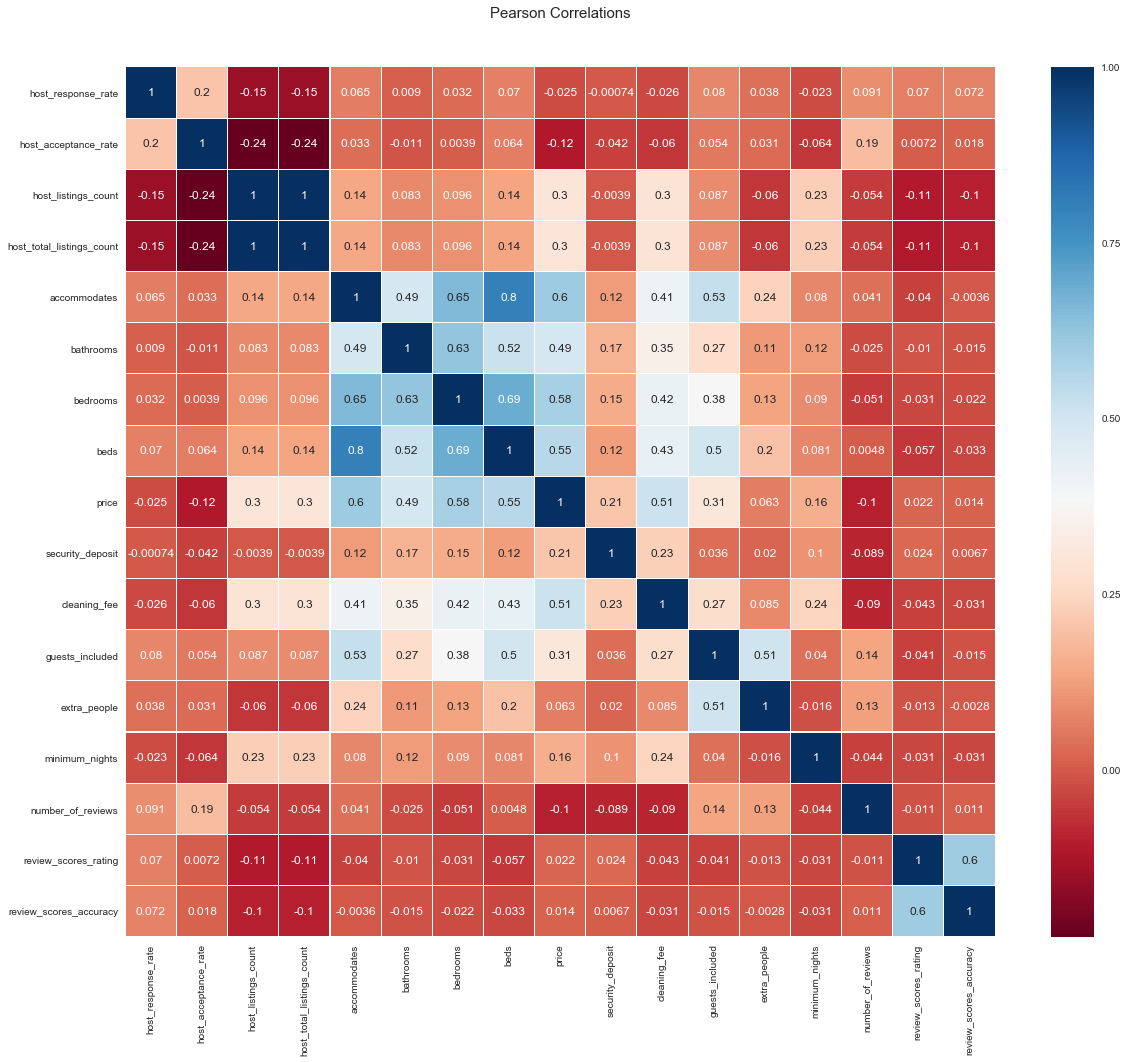

In [57]:
features.fillna(value=np.mean(features), inplace=True)

from scipy.stats import mstats
for col in features.columns:
    features[col] = mstats.winsorize(features[col], limits=[0.05, 0.05])

corr_df = features
colormap = plt.cm.RdBu
plt.figure(figsize=(20,16))
plt.title('Pearson Correlations', y=1.05, size=15)
sns.heatmap(features.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

The Pearson Correlation Chart does not show strong interrelatedness of many factors, as I was looking for variables that could be influenced by the host.
Next, I looked at review ratings.  I also looked more deeply at the slight correlation between host response rate and number of reviews.

### Question #5 -  What is the relationship between host response rate and review rating?

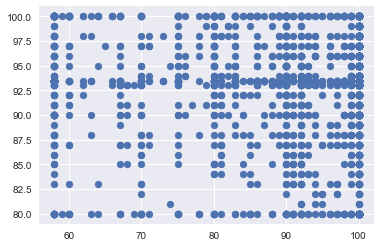

In [58]:
plt.scatter(features['host_response_rate'], features['review_scores_rating'])
plt.show()

In [59]:
features['host_response_rate'].corr(features['review_scores_rating'])

0.06971909239049814

The scatter plot and correlation calculation tell me there is a weak relationship between 'host response rate' and 'review scores rating'.

### Question # 6 - What is the impact of being a Superhost?

The slight correlation between host response rate and number of reviews caused me to explore the impact of a listing being managed by a Superhost.

'Superhost' is a designation for Airbnb hosts that meet or exceed the following criteria: 
- have an account in good standing
- have hosted 10 trips within the last year
- maintain a 90% + response rate to guests
- have 80% 5 star reviews

In this section, I looked at the statistics related to being a Superhost.

In [60]:
df['host_is_superhost'].replace(['f', 't'], ['regular host', 'Superhost'],inplace=True)
df['host_is_superhost'].replace('t', 'Superhost')

df2 = pd.value_counts(df['host_is_superhost'])
df2

regular host    3349
Superhost        347
Name: host_is_superhost, dtype: int64

In [61]:
(len(df[df['host_is_superhost']=='Superhost']) / len(df['host_is_superhost']))*100

9.38852813852814

In [62]:
df3 = df.groupby('host_is_superhost')['review_scores_rating'].mean()
df3

host_is_superhost
Superhost       97.014144
regular host    93.063273
Name: review_scores_rating, dtype: float64

In [63]:
a = df[df["host_is_superhost"] == "regular host"]['review_scores_rating']
b = df[df["host_is_superhost"] == "Superhost"]['review_scores_rating']

print(ttest_ind(a, b, equal_var=False))

Ttest_indResult(statistic=-22.191959884520077, pvalue=1.115642014204537e-90)


In [64]:
df4  = df.groupby('host_is_superhost')['number_of_reviews'].mean()
df4

host_is_superhost
Superhost       38.193084
regular host    13.010152
Name: number_of_reviews, dtype: float64

In [65]:
f = df[df["host_is_superhost"] == "regular host"]['number_of_reviews']
t = df[df["host_is_superhost"] == "Superhost"]['number_of_reviews']

print(ttest_ind(f, t, equal_var=False))

Ttest_indResult(statistic=-10.670104086123741, pvalue=2.19717105940051e-23)


In [66]:
df5 = df.groupby('host_is_superhost')['host_listings_count'].mean()
df5

host_is_superhost
Superhost        1.821326
regular host    14.818453
Name: host_listings_count, dtype: float64

In [67]:
c = df[df["host_is_superhost"] == "regular host"]['host_listings_count']
d = df[df["host_is_superhost"] == "Superhost"]['host_listings_count']

print(ttest_ind(c, d, equal_var=False))

Ttest_indResult(statistic=11.057393126819457, pvalue=6.07173721149728e-28)


Text(0.5,1,'Review scores rating')

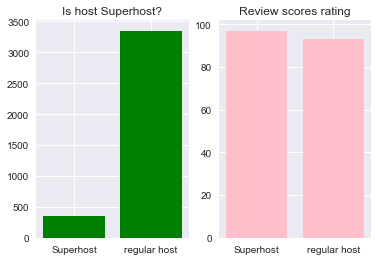

In [68]:
plt.subplot(121)
plt.bar(df2.index, df2, color='green')
plt.title("Is host Superhost?")

plt.subplot(122)
plt.bar(df3.index, df3, color = "pink")
plt.title("Review scores rating")

Text(0.5,1,'Average Number of Listings')

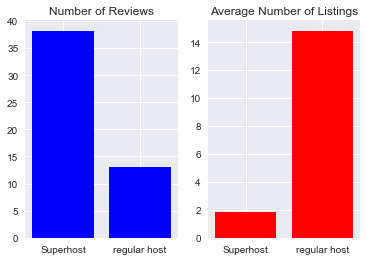

In [69]:
plt.subplot(121)
plt.bar(df4.index, df4, color = "blue")
plt.title("Number of Reviews")

plt.subplot(122)
plt.bar(df5.index, df5, color = "red")
plt.title("Average Number of Listings")

Analysis of Superhosts:
Only 9.4% of hosts were at the level of Superhost.
Regular hosts averaged 93.0% rating while a Superhost averaged 97.0% rating.
Superhosts had almost triple the number of reviews for their listings than regular hosts.
Superhosts, on average, managed much fewer properties than regular hosts.

## Conclusion

The most common configuration for AirBNB properties in DC in 2015 was 1 bedrooms rentals in the $116/night range. Pricing increased sharply once a lodging reached 6 bedrooms.  This points to renters with a large number of people in their party or who are looking for luxury accomodations that may be less sensitive to higher prices.

While there is not a direct correlation between host response rate and review rating, there is a marked difference between the number of reviews for the Superhost listings compared to regular host listings.  Listings of Superhosts have a higher average rating review score (97.0%) than regular hosts (93.0%).  Also, Superhosts have almost times the number of reviews for their properties as regular hosts (38 reviews to 13 reviews).  So, if renters see listings that have a large number of reviews as more attractive, having a Superhost manage an owner's property could increase the chances of their place being booked.  

## Further Research

The data I acquired was useful for descriptive analysis, but I would like to find a data set that includes number or rate of bookings, in order to see which variables can be influenced to increase bookings.